# ALY6020 Module 2 Building the Future of Car 

### Loading libraries

In [173]:
import bamboolib as bam 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import datetime

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [6]:
errors_df = pd.DataFrame()

### Loading dataset 

In [58]:
#Loading the Dataset and adding headings for easy analysis 
df=pd.read_csv("/Users/abhi/Documents/NU/AAA_Courses/ALY6020 Predictive Analytics/W2/Assignment/car.csv")
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


## Exploratory Data Analysis 

In [59]:
df.shape

(398, 8)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [61]:
df['Horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [62]:
fig = px.histogram(df, x='Horsepower')
fig

In [63]:
df['Horsepower'] = df['Horsepower'].replace('?', '')
df['Horsepower'] = pd.to_numeric(df['Horsepower'], downcast='integer', errors='coerce')
df[['Horsepower']] = df[['Horsepower']].fillna(df[['Horsepower']].median())
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,0
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [64]:
# Summary of dataset
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000


In [65]:
# percentage of missing values per column
(df.isna().sum() / len(df)) * 100

MPG             0.0
Cylinders       0.0
Displacement    0.0
Horsepower      0.0
Weight          0.0
Acceleration    0.0
Model Year      0.0
US Made         0.0
dtype: float64

In [66]:
#recheck dataframe shape
df.shape

(398, 8)

In [67]:
# check MPG columns
df['MPG'].value_counts()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: MPG, Length: 129, dtype: int64

#### Calculating age of the model 

In [68]:
# Get the current year
current_year = datetime.datetime.now().year

# Create a new column 'age' and calculate age from 'year' column
df['Age'] = df['Model Year'].apply(lambda x: current_year - (x + 1900))

df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made,Age
0,18.0,8,307.0,130.0,3504,12.0,70,1,53
1,15.0,8,350.0,165.0,3693,11.5,70,1,53
2,18.0,8,318.0,150.0,3436,11.0,70,1,53
3,16.0,8,304.0,150.0,3433,12.0,70,1,53
4,17.0,8,302.0,140.0,3449,10.5,70,1,53


### Visulizations

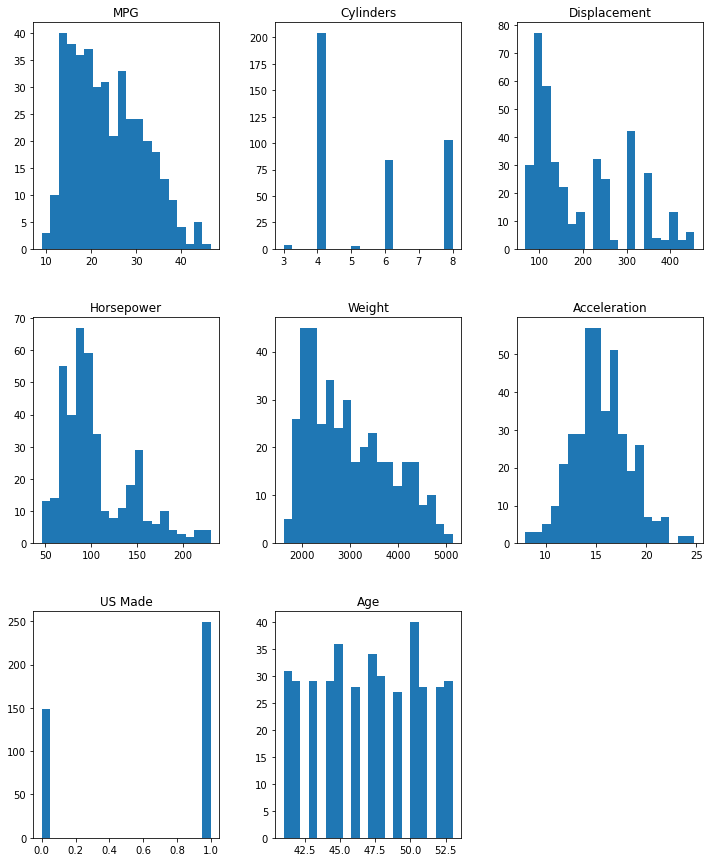

In [71]:
# Visualizing the distribution 
df.hist(figsize=(12,15),bins=20, grid=False)
plt.show()

In [38]:
# Histogram of cylinders versus the sum of MPG for each cyinder type. We can see that 4 cylinders are most common and majority are US made engines. 
fig = px.histogram(df, x='Cylinders', y='MPG', color='US Made')
fig

In [55]:
# Area plot of displacement versus mileage shows that they are inversely proportional.
fig = px.area(df, x='Displacement', y='MPG')
fig

In [40]:
#An important aspect of a vehicle's fuel usage is horsepower. In general, more power results in more fuel being consumed. This means that by selecting a car with no more horsepower than you require, you may save money on fuel and lessen your influence on the environment.
fig = px.histogram(df, x='Horsepower', y='MPG', color='US Made')
fig

In [42]:
fig = px.scatter(df, x='Weight', y='MPG', color='US Made', trendline="ols")
fig

In [44]:
fig = px.histogram(df, x='Acceleration', y='MPG', color='US Made')
fig

In [45]:
fig = px.histogram(df, x='Model Year', y='MPG', color='US Made')
fig

In [46]:
fig = px.histogram(df, x='US Made', color='US Made')
fig

In [54]:
# As the car model grows older, the mileage reduces. 
# While a car's age and the amount of miles on its odometer are significant factors to take into account, it's more crucial to look at how well the owner maintained the vehicle. A vehicle with 100,000 miles older than 10 years may have undergone more maintenance than one with 50,000 miles older than 5 years.
fig = px.scatter(df, x='Age', y='MPG', trendline="ols")
fig

In [69]:
# Dropping model year as it is not considered for analysis. 
df = df.drop(columns=['Model Year'])


## Outliers

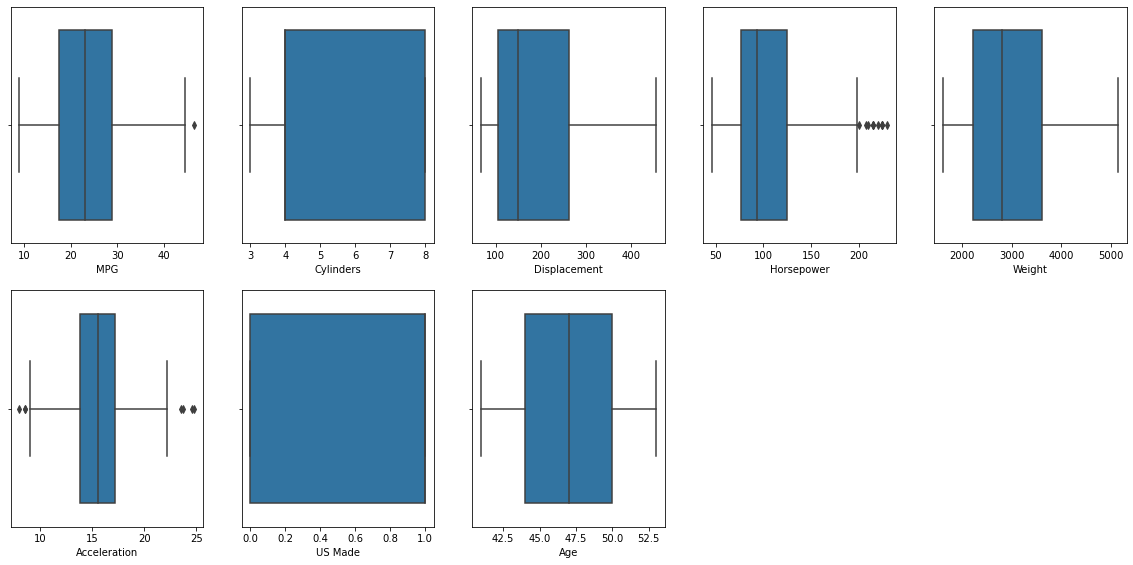

In [70]:
# ploting boxplot for all the columns to see distribution of the data in each columns 


plt.figure(figsize =(20, 20 ))
x = 1 

for column in df.columns:
    plt.subplot(4,5,x)
    sns.boxplot(df[column])
    x+=1
plt.tight_layout
plt.show()


# Linear Regression assumptions check 

#### Scatter plot confirms linearity assumption where the relationship between the independent and dependent variables should be linear.

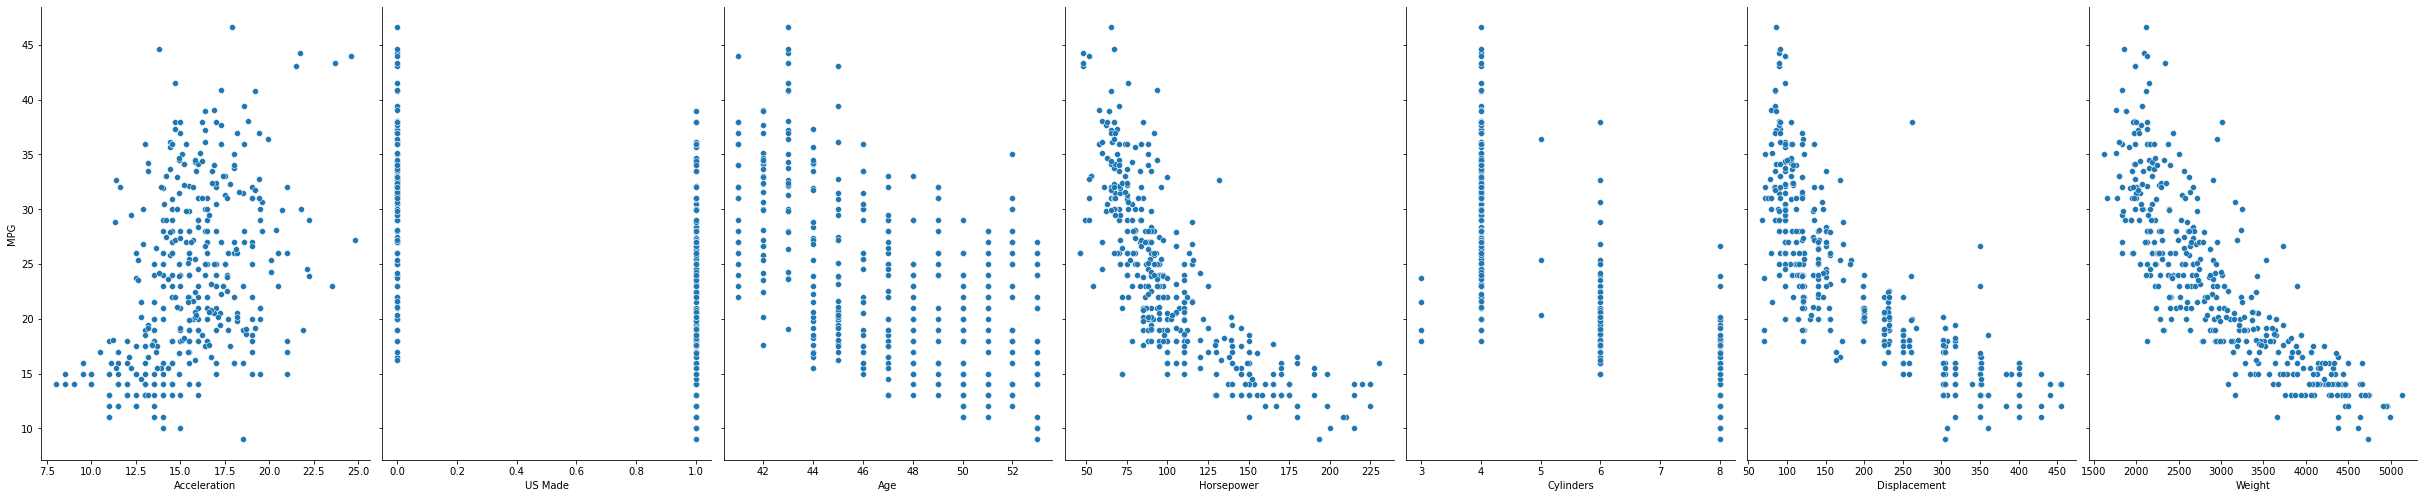

In [96]:
p = sns.pairplot(df, x_vars=['Acceleration','US Made','Age','Horsepower','Cylinders','Displacement','Weight'], y_vars='MPG', size=7, aspect=0.7)

#### Independence - The observations should be independent of each other.

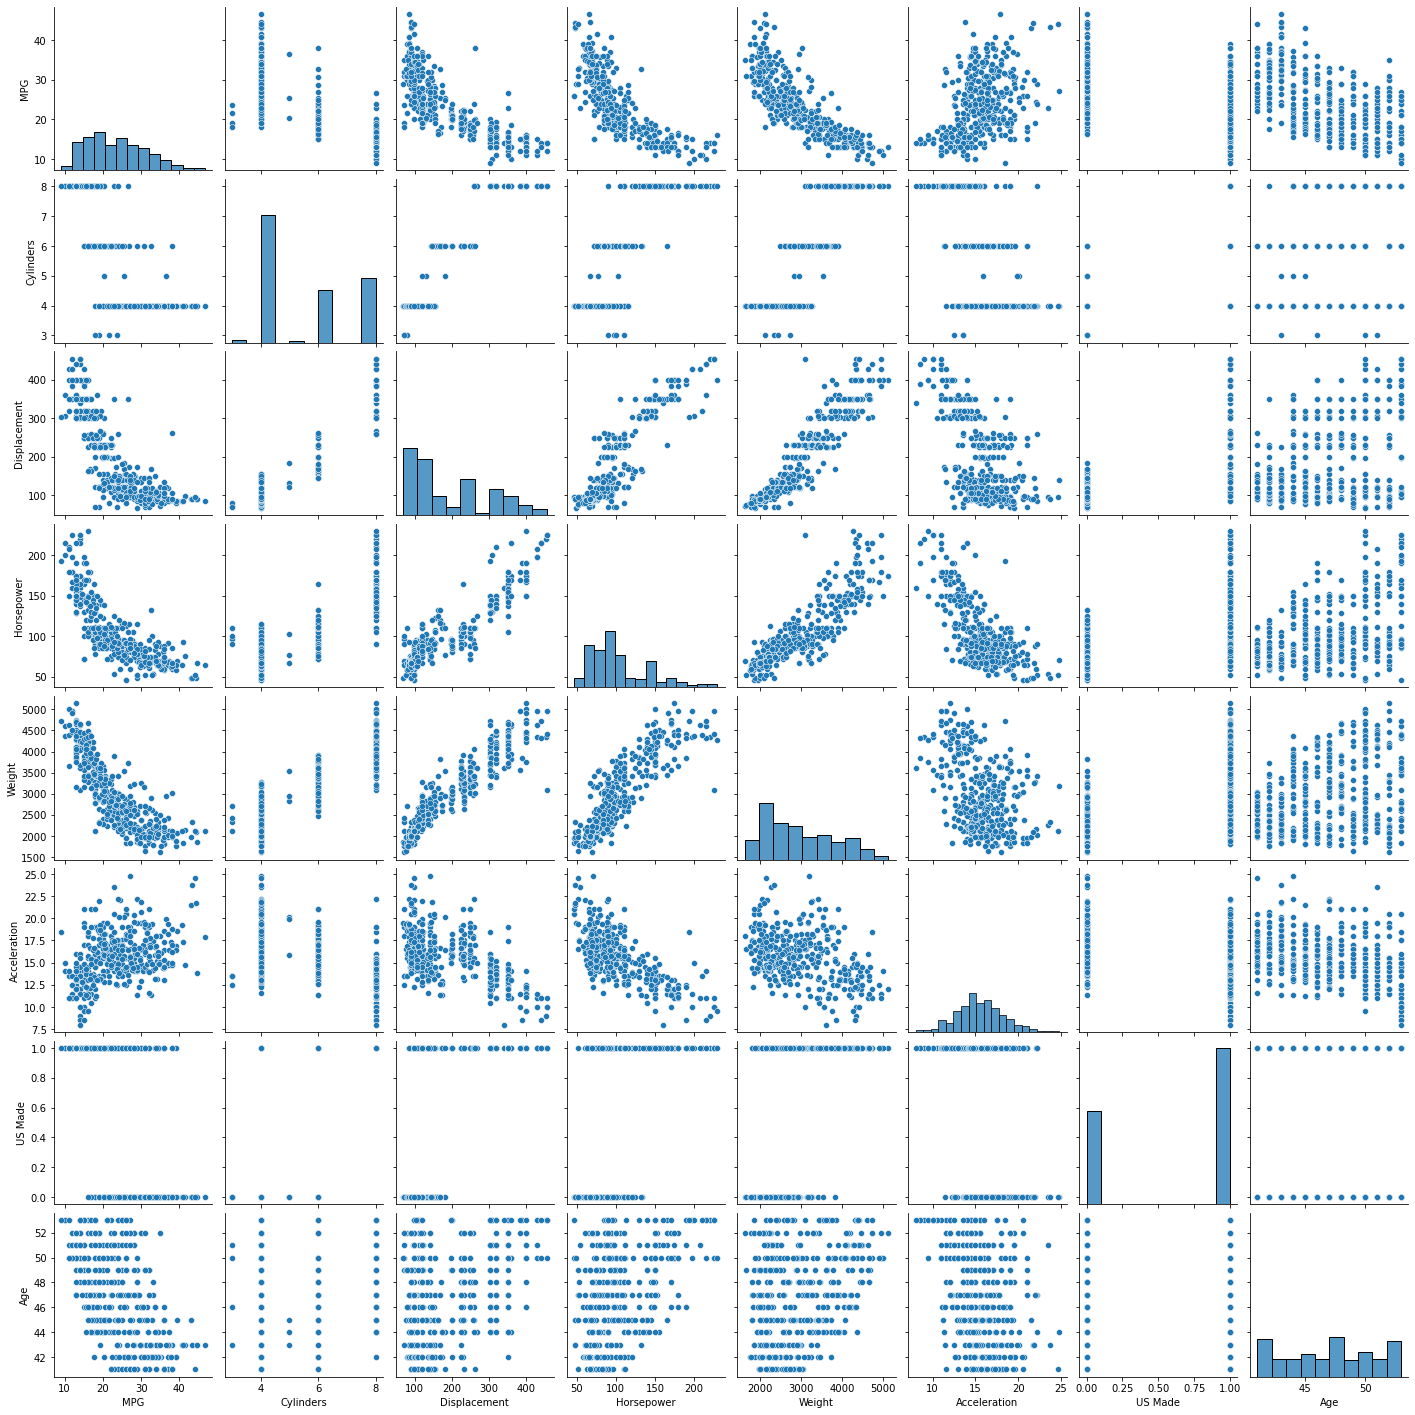

In [86]:

sns.pairplot(df)
plt.show()

#### Homoscedasticity - The variance of the errors should be constant across all levels of the independent variable.


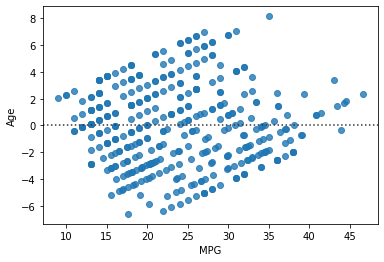

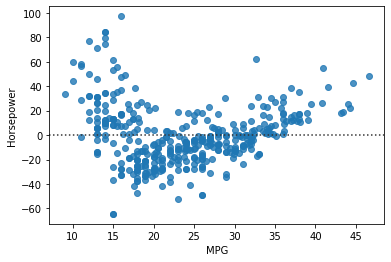

In [275]:
sns.residplot(x='MPG', y='Age', data=df)
plt.show()
sns.residplot(x='MPG', y='Horsepower', data=df)
plt.show()

#### Normality - The errors should be normally distributed.

residuals = df['Weight'] - df['MPG'].apply(lambda x: LinearRegression().fit(df[['MPG']], df['Weight']).predict([x]))
sns.distplot(residuals)
plt.show()

#### Multicollinearity - The independent variables should not be highly correlated with each other.
In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics.

In [75]:
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [76]:
calc_vif(df)

,variables,VIF
0,MPG,19.958295
1,Cylinders,115.856426
2,Displacement,93.168520
3,Horsepower,76.455958
4,Weight,150.319033
5,Acceleration,78.715209
6,US Made,5.090719
7,Age,100.816196


In [97]:
df_vif_test = df

In [98]:
df_vif_test = df_vif_test.drop(columns=['Cylinders'])
calc_vif(df_vif_test)

,variables,VIF
0,MPG,19.315617
1,Displacement,55.593977
2,Horsepower,75.971989
3,Weight,145.879393
4,Acceleration,78.703302
5,US Made,5.081061
6,Age,93.434022


In [99]:
df_vif_test = df_vif_test.drop(columns=['Weight'])
calc_vif(df_vif_test)

,variables,VIF
0,MPG,18.184910
1,Displacement,35.861987
2,Horsepower,57.910088
3,Acceleration,46.998207
4,US Made,5.080457
5,Age,92.759461


## Correlation matrix 

<AxesSubplot:>

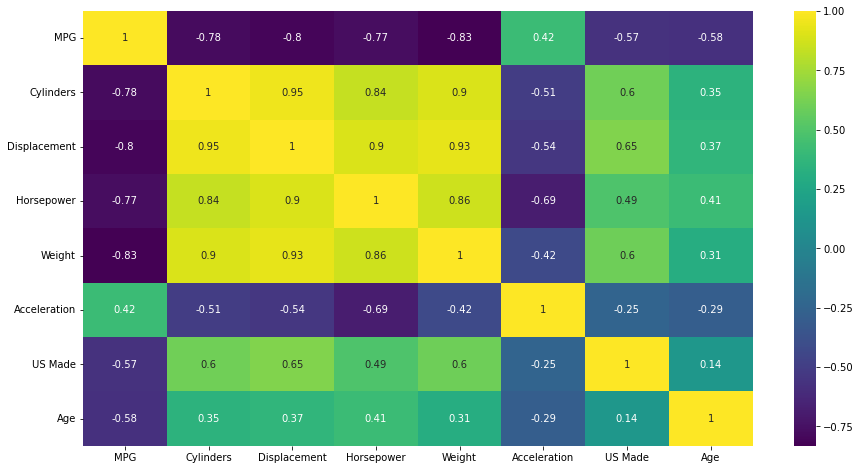

In [273]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [274]:
correlation = df.corr()
correlation['MPG'].sort_values(ascending = False)[1:]

Acceleration    0.420289
US Made        -0.568192
Age            -0.579267
Horsepower     -0.773453
Cylinders      -0.775396
Displacement   -0.804203
Weight         -0.831741
Name: MPG, dtype: float64

<AxesSubplot:>

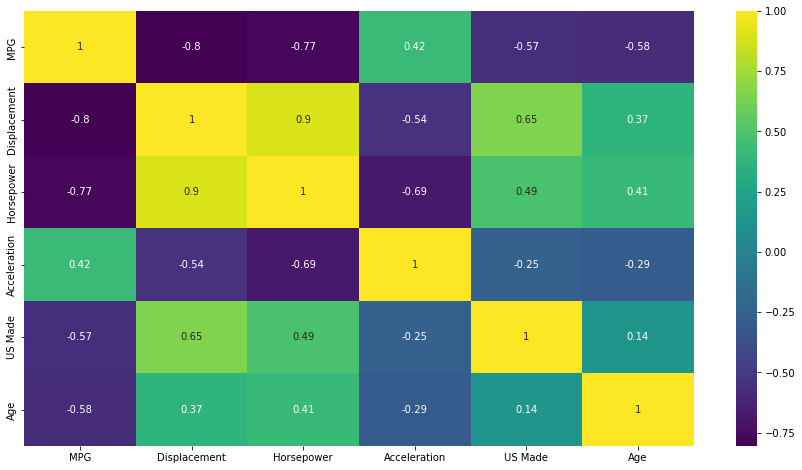

In [100]:
plt.figure(figsize=(15,8))
sns.heatmap(df_vif_test.corr(), annot=True, cmap='viridis')

In [101]:
correlation = df_vif_test.corr()
correlation['MPG'].sort_values(ascending = False)[1:]

Acceleration    0.420289
US Made        -0.568192
Age            -0.579267
Horsepower     -0.773453
Displacement   -0.804203
Name: MPG, dtype: float64

## Linear Regression

#### Train-test split

In [313]:
x = df_vif_test.drop(['MPG'], axis = 1)
y = df_vif_test['MPG']

In [314]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

#### Standard Scaling 

In [315]:
# Feature before mean normalization
unscaled_features = x_train
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_array = sc.fit_transform(x_train.values)
# Assign the scaled data to a DataFrame and use the index and columns arguments to keep original indeces and column names:
x_train = pd.DataFrame(x_train_array, index= x_train.index, columns= x_train.columns)
x_test_array = sc.transform(x_test.values)
x_test = pd.DataFrame(x_test_array, index= x_test.index, columns= x_test.columns)

#### Base model 

In [316]:
lr = sm.add_constant(x_train) 
lr_model = sm.OLS(y_train, lr) 
lr_fit = lr_model.fit()
print(lr_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     199.9
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           5.19e-95
Time:                        12:37:18   Log-Likelihood:                -879.22
No. Observations:                 318   AIC:                             1770.
Df Residuals:                     312   BIC:                             1793.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.6931      0.217    108.939   

## Optimizing 

### Forward selection 

In [302]:
x = df.drop(['MPG'], axis = 1)
y = df['MPG']

In [303]:
lreg = LinearRegression()

sfs1 = sfs(lreg, k_features=5, forward=True, verbose=1, scoring='neg_mean_squared_error')

In [304]:
sfs1 = sfs1.fit(x, y)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished
Features: 1/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished
Features: 2/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
Features: 3/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
Features: 4/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
Features: 5/5

In [305]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['Cylinders', 'Displacement', 'Weight', 'US Made', 'Age']


In [306]:
cols_to_keep = ['Cylinders', 'Displacement', 'Weight', 'US Made', 'Age']
x = df[cols_to_keep]
y = df['MPG']

In [307]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [308]:
# Feature before mean normalization
unscaled_features = x_train
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_array = sc.fit_transform(x_train.values)
# Assign the scaled data to a DataFrame and use the index and columns arguments to keep original indeces and column names:
x_train = pd.DataFrame(x_train_array, index= x_train.index, columns= x_train.columns)
x_test_array = sc.transform(x_test.values)
x_test = pd.DataFrame(x_test_array, index= x_test.index, columns= x_test.columns)

In [309]:
lr = sm.add_constant(x_train) 
lr_model = sm.OLS(y_train, lr) 
lr_fit = lr_model.fit()
print(lr_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     279.8
Date:                Sun, 22 Jan 2023   Prob (F-statistic):          5.52e-113
Time:                        11:38:20   Log-Likelihood:                -836.93
No. Observations:                 318   AIC:                             1686.
Df Residuals:                     312   BIC:                             1708.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.6931      0.190    124.434   

### Backward Selection 

In [277]:
x = df.drop(['MPG'], axis = 1)
y = df['MPG']

In [278]:
lreg = LinearRegression()

sfs1 = sfs(lreg, k_features=4, forward=False, verbose=1, scoring='neg_mean_squared_error')

In [279]:
sfs1 = sfs1.fit(x, y)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished
Features: 6/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished
Features: 5/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
Features: 4/4

In [280]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['Displacement', 'Weight', 'US Made', 'Age']


In [281]:
cols_to_keep = ['Displacement', 'Weight', 'US Made', 'Age']
x = df[cols_to_keep]
y = df['MPG']

In [282]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [283]:
# Feature before mean normalization
unscaled_features = x_train
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_array = sc.fit_transform(x_train.values)
# Assign the scaled data to a DataFrame and use the index and columns arguments to keep original indeces and column names:
x_train = pd.DataFrame(x_train_array, index= x_train.index, columns= x_train.columns)
x_test_array = sc.transform(x_test.values)
x_test = pd.DataFrame(x_test_array, index= x_test.index, columns= x_test.columns)

In [284]:
lr = sm.add_constant(x_train) 
lr_model = sm.OLS(y_train, lr) 
lr_fit = lr_model.fit()
print(lr_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     350.0
Date:                Sun, 22 Jan 2023   Prob (F-statistic):          3.80e-114
Time:                        11:33:10   Log-Likelihood:                -837.25
No. Observations:                 318   AIC:                             1685.
Df Residuals:                     313   BIC:                             1703.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.6931      0.190    124.506   